<a href="https://colab.research.google.com/github/ArturoMachuca/IA_2024_01/blob/main/PROYECTO_IA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTELIGENCIA ARTIFICIAL APLICADA - ARTURO MACHUCA - 2024/01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/energy_dataset.csv')

### PREPROCESAMIENTO DE DATOS

In [ ]:
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [3]:
df.time = pd.to_datetime(df.time, utc = True, infer_datetime_format= True)
df = df.set_index('time')
df.head()

<ipython-input-3-837adc7495bc>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.time = pd.to_datetime(df.time, utc = True, infer_datetime_format= True)


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
df['generation fossil brown coal/lignite']

time
2014-12-31 23:00:00+00:00    329.0
2015-01-01 00:00:00+00:00    328.0
2015-01-01 01:00:00+00:00    323.0
2015-01-01 02:00:00+00:00    254.0
2015-01-01 03:00:00+00:00    187.0
                             ...  
2018-12-31 18:00:00+00:00      0.0
2018-12-31 19:00:00+00:00      0.0
2018-12-31 20:00:00+00:00      0.0
2018-12-31 21:00:00+00:00      0.0
2018-12-31 22:00:00+00:00      0.0
Name: generation fossil brown coal/lignite, Length: 35064, dtype: float64

In [ ]:
df.isnull().sum() #NaN

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

Recuento de datos nulos

In [ ]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print(f"{column_name:{50}} : {count}")

generation biomass                                 : 4
generation fossil brown coal/lignite               : 10517
generation fossil coal-derived gas                 : 35046
generation fossil gas                              : 1
generation fossil hard coal                        : 3
generation fossil oil                              : 3
generation fossil oil shale                        : 35046
generation fossil peat                             : 35046
generation geothermal                              : 35046
generation hydro pumped storage aggregated         : 0
generation hydro pumped storage consumption        : 12607
generation hydro run-of-river and poundage         : 3
generation hydro water reservoir                   : 3
generation marine                                  : 35045
generation nuclear                                 : 3
generation other                                   : 4
generation other renewable                         : 3
generation solar                     

In [4]:
df.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
           'generation wind offshore', 'generation fossil coal-derived gas',
           'generation fossil oil shale', 'generation fossil peat', 'generation marine',
           'generation wind offshore', 'generation geothermal'], inplace = True, axis = 1)

In [ ]:
df.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0


Graficos y datos faltantes

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)

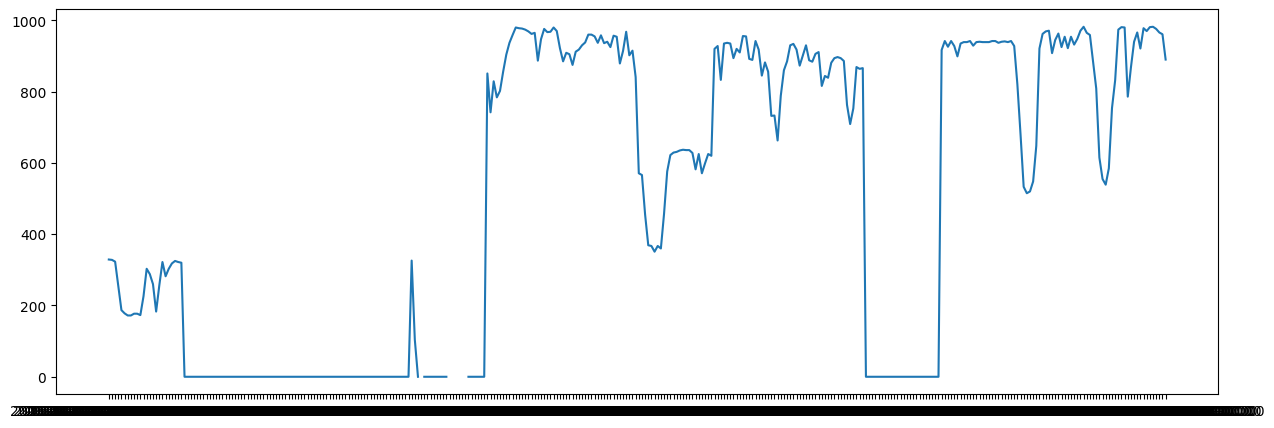

In [ ]:
plt.plot(df['generation fossil brown coal/lignite'][:24*7*2])
plt.show()

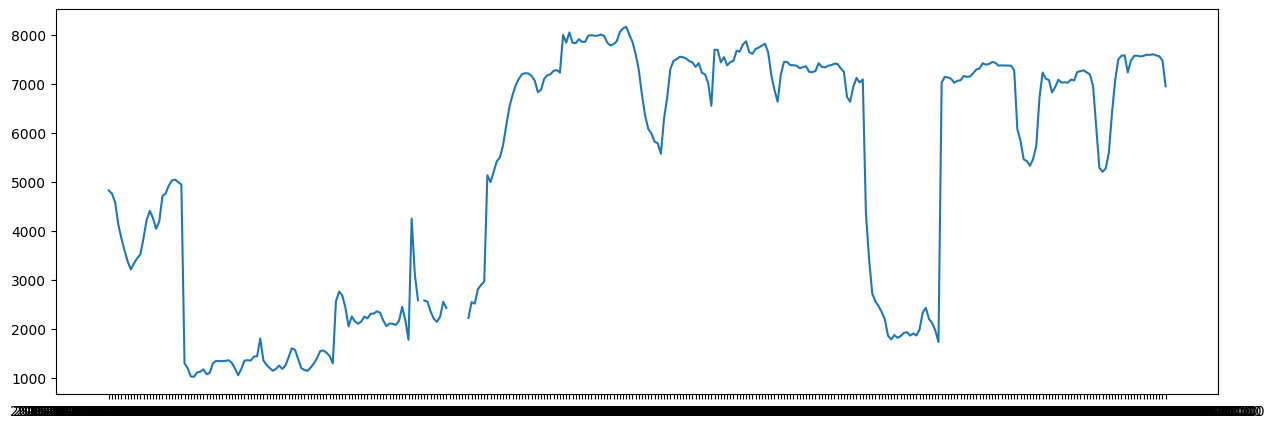

In [ ]:
plt.plot(df['generation fossil hard coal'][:24*7*2])
plt.show()

Interpolación con spline de orden 1 para completar datos faltantes

In [5]:
df.interpolate(method='slinear', limit_direction='forward', inplace=True, axis=0)

Revisamos los mismos graficos...

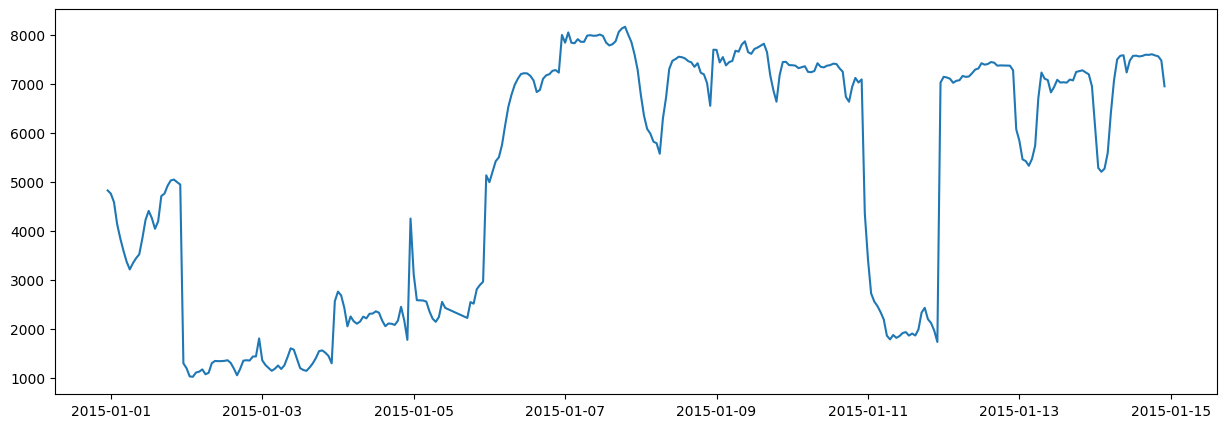

In [ ]:
plt.plot(df['generation fossil hard coal'][:24*7*2])
plt.show()

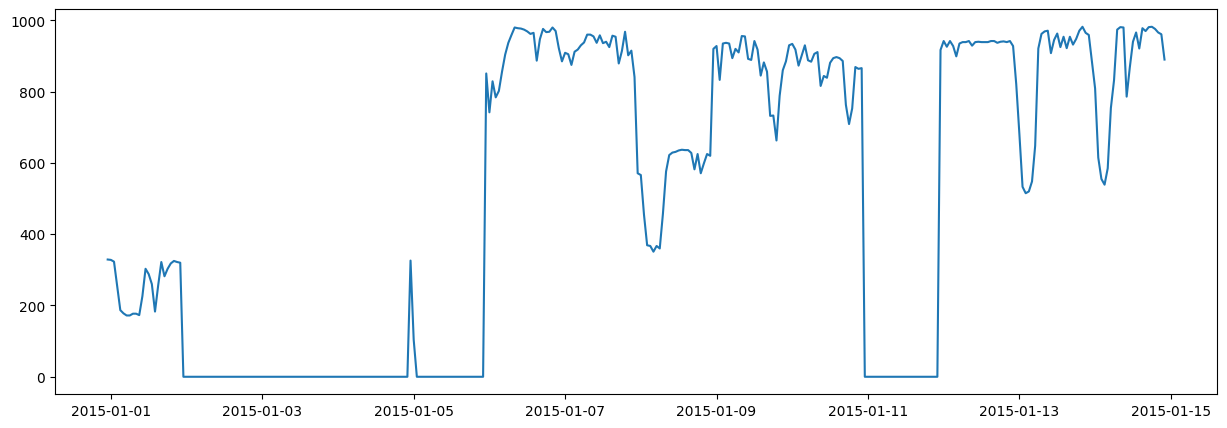

In [ ]:
plt.plot(df['generation fossil brown coal/lignite'][:24*7*2])
plt.show()

In [ ]:
df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [ ]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.531343,448.094570,5622.700647,4256.531271,298.342417,475.582706,972.201902,2605.534123,6263.483430,60.226030,85.634326,1432.818546,269.418692,5464.980450,1439.066735,5471.216689,28712.129962,28698.281385,49.874341,57.884023
std,85.346266,354.618269,2201.510984,1961.988937,52.519927,792.312704,400.712304,1835.175078,840.272333,20.238792,14.076948,1679.961733,50.218423,3213.586296,1677.703355,3176.312853,4594.100854,4575.828854,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1078.000000,5759.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,69.000000,2979.000000,24793.750000,24807.000000,41.490000,49.347500
50%,367.000000,509.000000,4969.500000,4475.000000,300.000000,68.000000,906.000000,2165.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4849.500000,576.000000,4855.000000,28906.000000,28902.000000,50.520000,58.020000
75%,433.000000,757.000000,6429.000000,5839.000000,330.000000,616.000000,1250.000000,3758.000000,7025.000000,80.000000,97.000000,2579.000000,310.000000,7399.500000,2636.000000,7353.000000,32263.250000,32194.250000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [6]:
df['total generation'] = df['generation biomass'] + df['generation fossil brown coal/lignite'] + df['generation fossil gas'] + df['generation fossil hard coal'] + df['generation fossil oil'] + df['generation hydro pumped storage consumption'] + df['generation hydro run-of-river and poundage'] + df['generation hydro water reservoir'] + df['generation nuclear'] + df['generation other'] + df['generation other renewable'] + df['generation solar'] + df['generation waste'] + df['generation wind onshore']
df.drop(['generation hydro pumped storage consumption', 'generation hydro pumped storage consumption', 'generation hydro water reservoir'], axis=1,inplace=True)
df.drop(['generation nuclear', 'generation other', 'generation solar','generation wind onshore'], axis=1,inplace=True)
df.drop(['generation other renewable', 'generation waste', 'forecast solar day ahead'], axis=1,inplace=True)
df.drop(['forecast wind onshore day ahead','generation biomass','generation hydro run-of-river and poundage'], axis=1,inplace=True)
df.describe()

,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,total load forecast,total load actual,price day ahead,price actual,total generation
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,448.094570,5622.700647,4256.531271,298.342417,28712.129962,28698.281385,49.874341,57.884023,28639.080453
std,354.618269,2201.510984,1961.988937,52.519927,4594.100854,4575.828854,14.618900,14.204083,4186.310196
min,0.000000,0.000000,0.000000,0.000000,18105.000000,18041.000000,2.060000,9.330000,6899.000000
25%,0.000000,4126.000000,2527.000000,263.000000,24793.750000,24807.000000,41.490000,49.347500,25448.000000
50%,509.000000,4969.500000,4475.000000,300.000000,28906.000000,28902.000000,50.520000,58.020000,28456.000000
75%,757.000000,6429.000000,5839.000000,330.000000,32263.250000,32194.250000,60.530000,68.010000,31571.000000
max,999.000000,20034.000000,8359.000000,449.000000,41390.000000,41015.000000,101.990000,116.800000,42310.000000


GRAFICOS

In [ ]:
import seaborn as sns

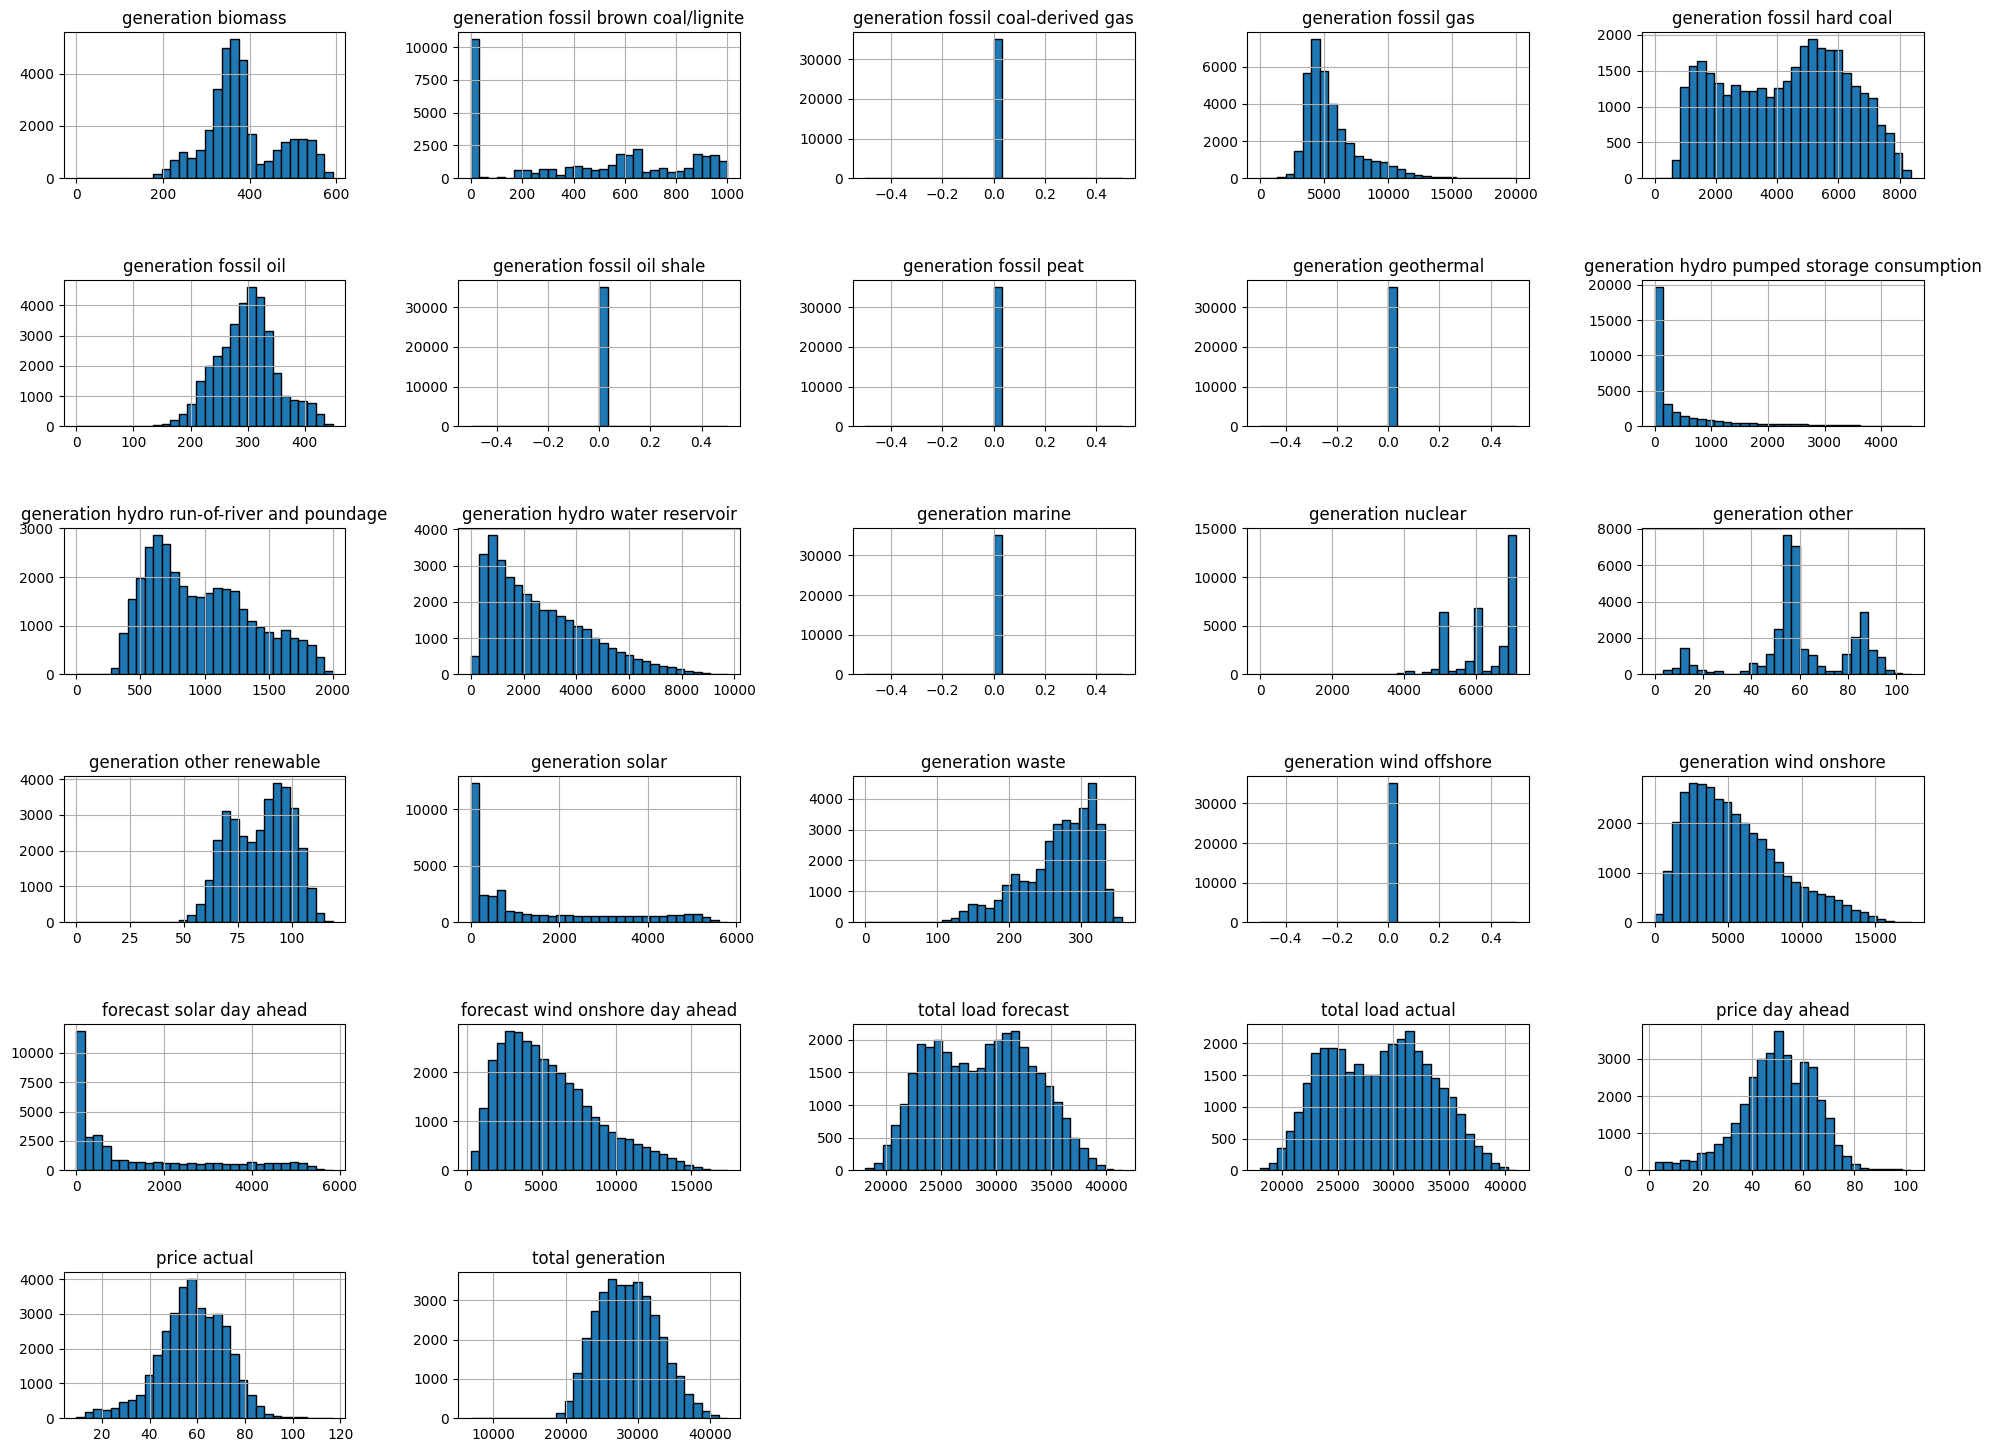

In [ ]:
df.hist(figsize=(24,18), bins = 30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: xlabel='price actual', ylabel='Count'>

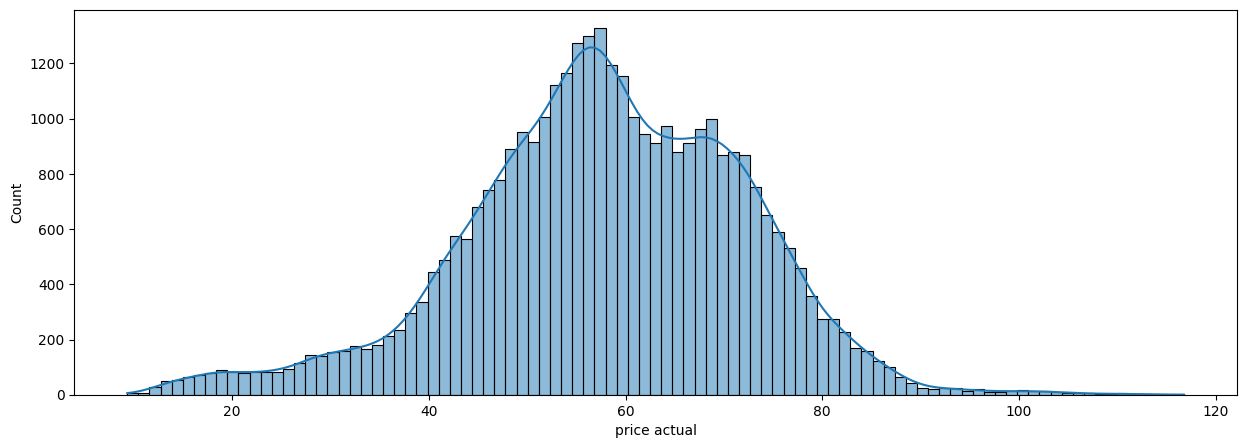

In [ ]:
sns.histplot(df['price actual'], kde=True)

<Axes: xlabel='total generation', ylabel='Count'>

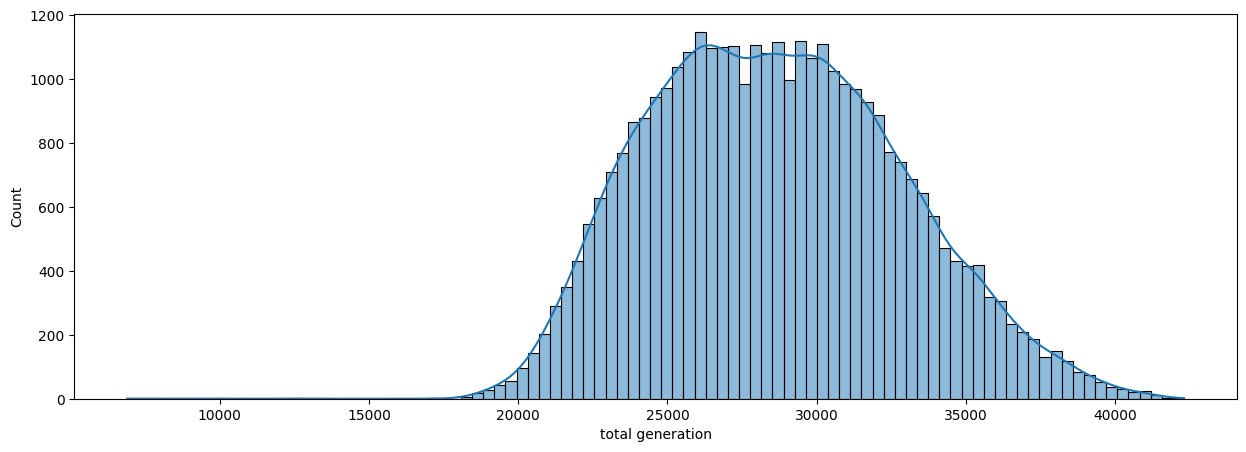

In [ ]:
sns.histplot(df['total generation'], kde=True)

Utilizamos ```rolling()``` para generar un promedio móvil



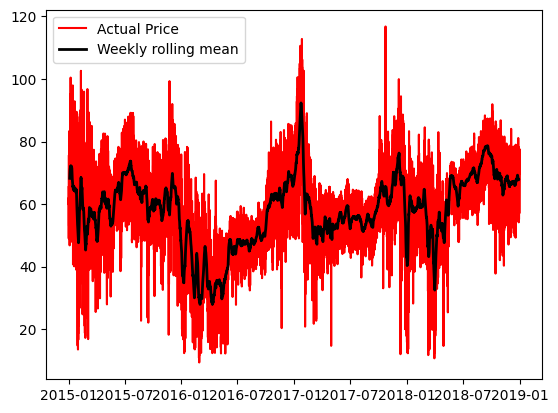

In [ ]:
fig, ax = plt.subplots(1,1)
weekly_rolling_mean = df['price actual'].rolling(24*7, center = True).mean()
ax.plot(df['price actual'], color = 'red', label='Actual Price')
ax.plot(weekly_rolling_mean, color = 'black', linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.legend()
plt.show()

Lagged features

[]

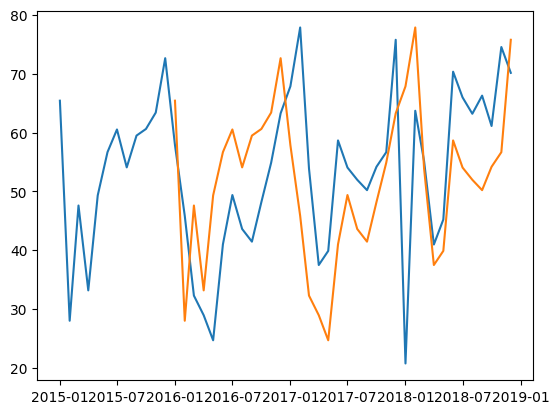

In [ ]:
monthly_price = df['price actual'].asfreq('M')
lagged_m = monthly_price.shift(12)

fig, ax = plt.subplots(1,1)
ax.plot(monthly_price, label = 'Monthly Price')
ax.plot(lagged_m, label ='1 yr lagged')
plt.plot()

[]

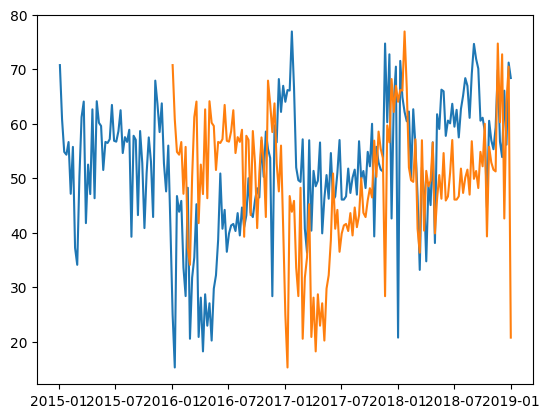

In [ ]:
weekly_price = df['price actual'].asfreq('W')
lagged_w = weekly_price.shift(52)

fig, ax = plt.subplots(1,1)
ax.plot(weekly_price, label = 'Weekly Price')
ax.plot(lagged_w, label ='1 yr lagged')
plt.plot()

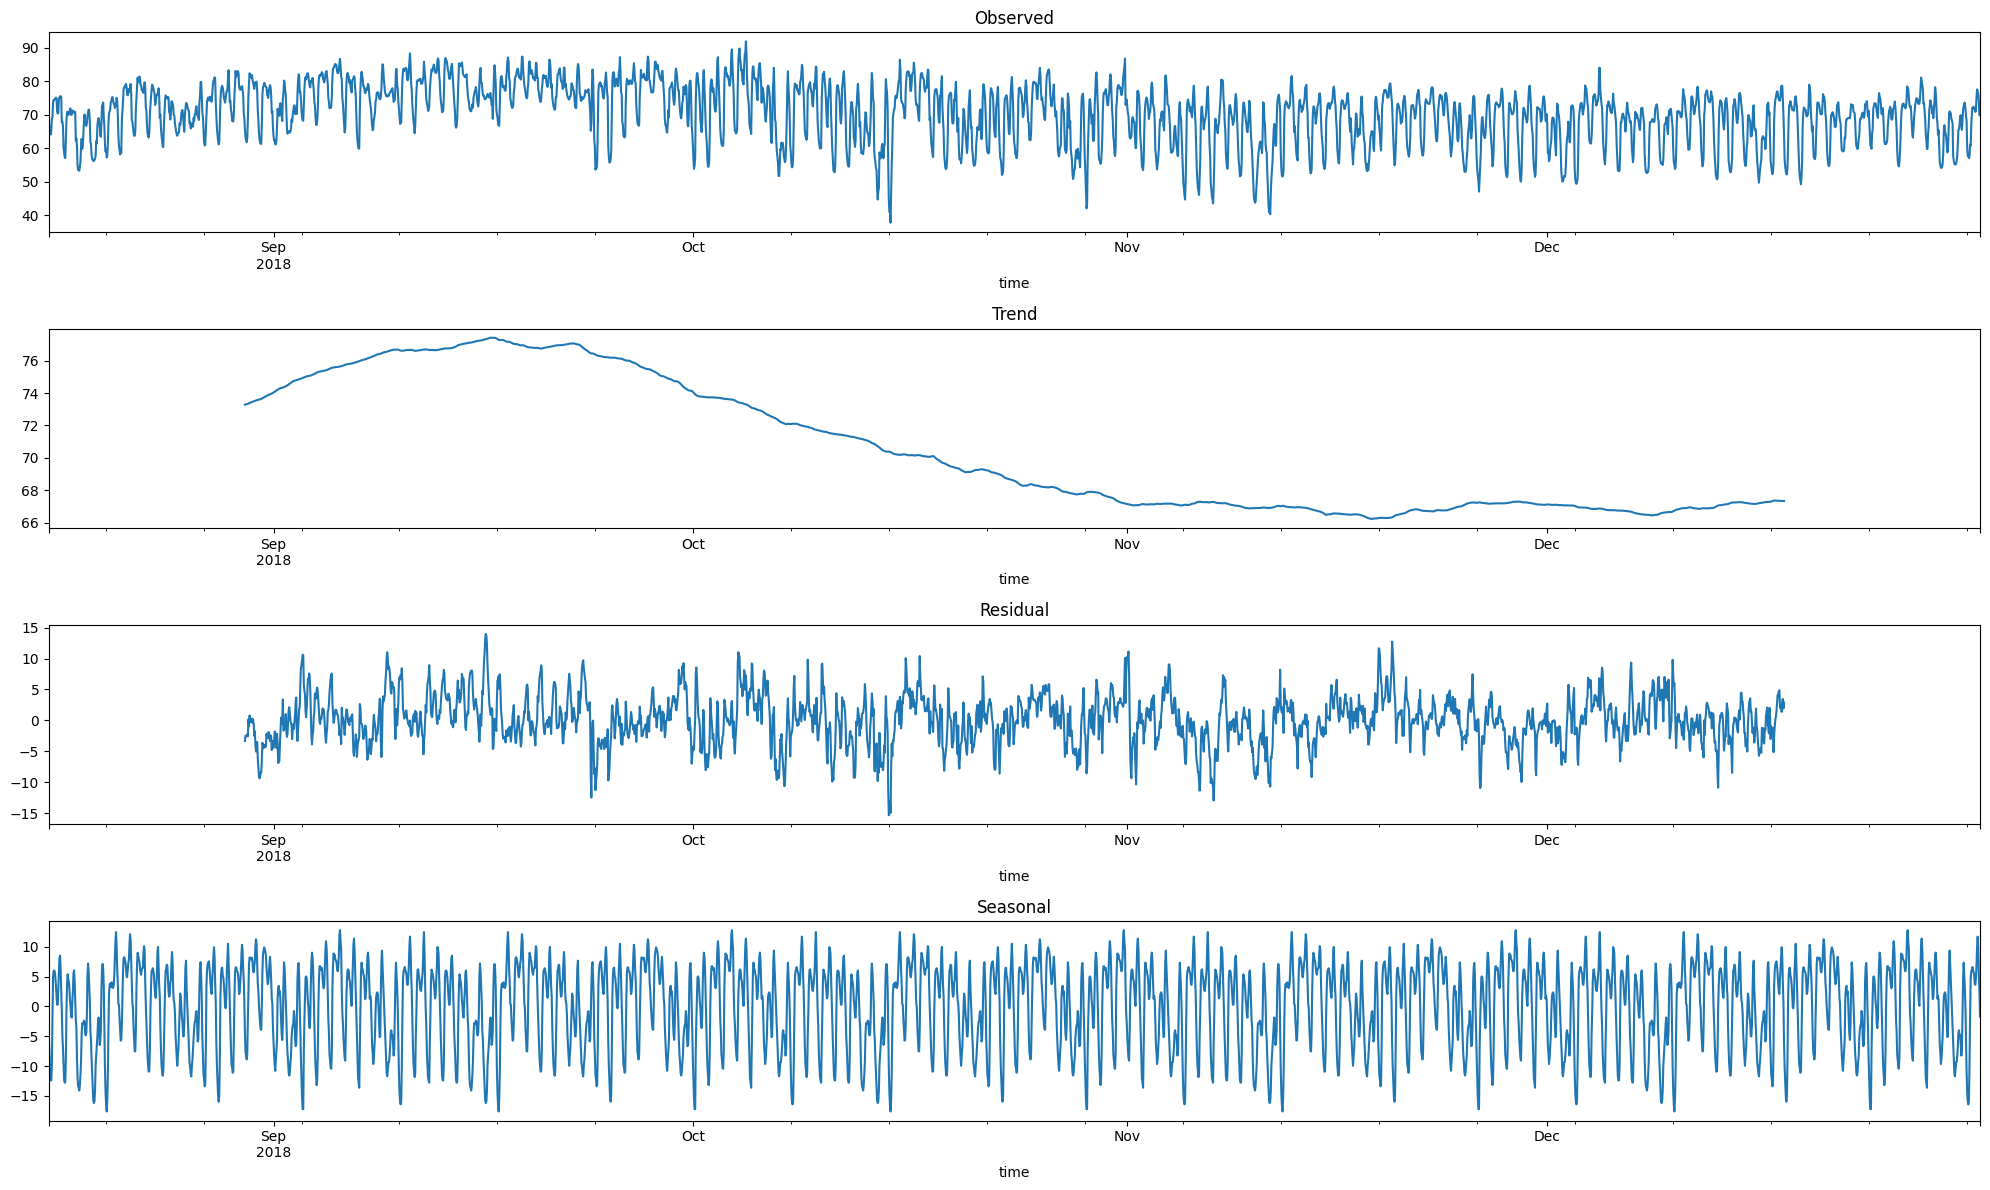

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = sm.tsa.seasonal_decompose(df['price actual']['2018-08-16 00:00:00+01:00': ], model='Additive', period=24*7*4)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
decomp.observed.plot(ax=ax1, title='Observed')
decomp.trend.plot(ax=ax2, title='Trend')
decomp.resid.plot(ax=ax3, title='Residual')
decomp.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [ ]:
df_train = df['price actual']['2015-01-01 00:00:00+01:00':'2018-08-16 00:00:00+01:00'	]
df_test = df['price actual']['2018-08-16 00:00:00+01:00':	]

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

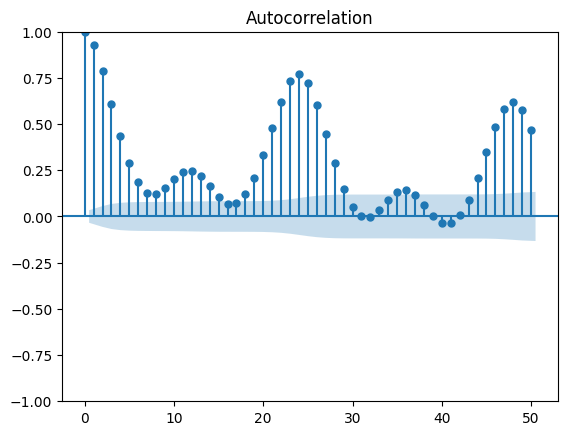

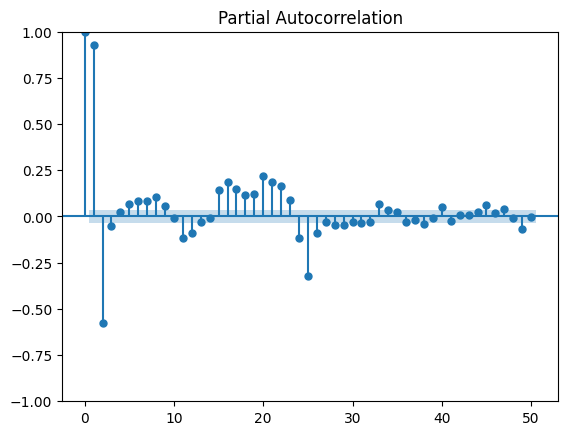

In [ ]:
acf_train = plot_acf(df_test,lags=50)
pacf_train = plot_pacf(df_test,lags=50)

In [ ]:
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 2.2502951235038377e-15


Esto indica que la serie temporal es estacionaria

### MODELO

### SARIMAX

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = sm.tsa.SARIMAX(df_train.asfreq('W'), order=(2,1,1), seasonal_order=(1,1,1,16))
## SARIMAX(2, 1, 1)x(1, 1, 1, 16) : AIC ---->  1306.560

In [ ]:
pred_sarimax = model.fit()
print(pred_sarimax.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                       price actual   No. Observations:                  189
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 16)   Log Likelihood                -647.280
Date:                            Wed, 10 Jul 2024   AIC                           1306.560
Time:                                    00:16:02   BIC                           1325.445
Sample:                                01-04-2015   HQIC                          1314.222
                                     - 08-12-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1385      0.164     -0.845      0.398      -0.460       0.183
ar.L2         -0.0272      0.125   

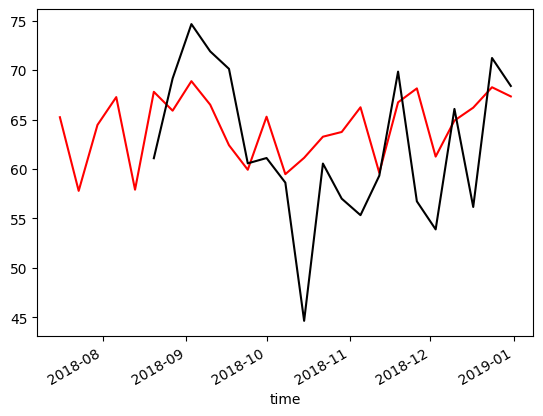

In [ ]:
aber = pred_sarimax.predict(start='2018-07-16 00:00:00+01:00', end='2018-12-31 22:00:00+00:00	')

aber.plot(color='red')
df_test.asfreq('W').plot(color='black')
plt.show()

### ANN

Predicción "price actual" con "price actual"

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, max_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout
import datetime as dt

In [8]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [9]:
 price = df['price actual']

In [10]:
WINDOW_SIZE = 24
X1, y1 = df_to_X_y(price, WINDOW_SIZE)
X1.shape, y1.shape

((35040, 24, 1), (35040,))

In [26]:
X_train1, y_train1 = X1[:25000], y1[:25000]
X_val1, y_val1 = X1[25000:30000], y1[25000:30000]
X_test1, y_test1 = X1[30000:], y1[30000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((25000, 24, 1), (25000,), (5000, 24, 1), (5000,), (5040, 24, 1), (5040,))

In [27]:
model1 = Sequential()
model1.add(InputLayer((24, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [31]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
782/782 [==============================] - 21s 21ms/step - loss: 7.0880 - root_mean_squared_error: 2.6623 - val_loss: 8.2092 - val_root_mean_squared_error: 2.8652
Epoch 2/10
782/782 [==============================] - 16s 20ms/step - loss: 6.9924 - root_mean_squared_error: 2.6443 - val_loss: 7.8958 - val_root_mean_squared_error: 2.8099
Epoch 3/10
782/782 [==============================] - 13s 17ms/step - loss: 6.9334 - root_mean_squared_error: 2.6331 - val_loss: 8.0961 - val_root_mean_squared_error: 2.8454
Epoch 4/10
782/782 [==============================] - 12s 16ms/step - loss: 6.9146 - root_mean_squared_error: 2.6296 - val_loss: 8.1255 - val_root_mean_squared_error: 2.8505
Epoch 5/10
782/782 [==============================] - 11s 15ms/step - loss: 6.8779 - root_mean_squared_error: 2.6226 - val_loss: 8.0264 - val_root_mean_squared_error: 2.8331
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 6.8676 - root_mean_squared_error: 2.6206 - val_loss: 7

In [32]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [33]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

782/782 [==============================] - 6s 7ms/step


,Train Predictions,Actuals
0,61.285358,64.02
1,61.809361,58.46
2,56.113300,54.70
3,53.018730,54.91
4,55.633293,53.07
...,...,...
24995,65.571907,66.29
24996,65.418243,66.63
24997,65.989792,66.47
24998,65.825035,65.32


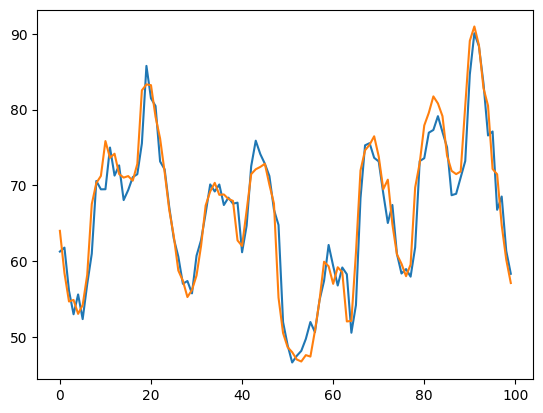

In [40]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [35]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

158/158 [==============================] - 1s 6ms/step


,Test Predictions,Actuals
0,55.546619,57.77
1,56.174896,56.08
2,54.703411,55.46
3,55.326385,55.24
4,56.647282,55.86
...,...,...
5035,78.876579,77.02
5036,76.351089,76.16
5037,74.700821,74.30
5038,71.369743,69.89


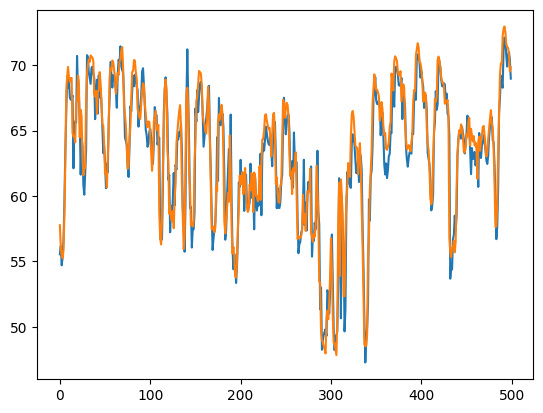

In [39]:
plt.plot(test_results['Test Predictions'][:500])
plt.plot(test_results['Actuals'][:500])

LSTM con otros parametros

In [41]:
price_df = pd.DataFrame({'PRICE ACTUAL':price})
price_df['Seconds'] = price_df.index.map(pd.Timestamp.timestamp)
price_df

,PRICE ACTUAL,Seconds
time,,
2014-12-31 23:00:00+00:00,65.41,1.420067e+09
2015-01-01 00:00:00+00:00,64.92,1.420070e+09
2015-01-01 01:00:00+00:00,64.48,1.420074e+09
2015-01-01 02:00:00+00:00,59.32,1.420078e+09
2015-01-01 03:00:00+00:00,56.04,1.420081e+09
...,...,...
2018-12-31 18:00:00+00:00,77.02,1.546279e+09
2018-12-31 19:00:00+00:00,76.16,1.546283e+09
2018-12-31 20:00:00+00:00,74.30,1.546286e+09


In [42]:
# Periodicidad, trend

day = 60*60*24
year = 365.2425*day

price_df['Day sin'] = np.sin(price_df['Seconds'] * (2* np.pi / day))
price_df['Day cos'] = np.cos(price_df['Seconds'] * (2 * np.pi / day))
price_df['Year sin'] = np.sin(price_df['Seconds'] * (2 * np.pi / year))
price_df['Year cos'] = np.cos(price_df['Seconds'] * (2 * np.pi / year))
price_df.head()

,PRICE ACTUAL,Seconds,Day sin,Day cos,Year sin,Year cos
time,,,,,,
2014-12-31 23:00:00+00:00,65.41,1.420067e+09,-2.588190e-01,0.965926,0.000788,1.000000
2015-01-01 00:00:00+00:00,64.92,1.420070e+09,1.232357e-12,1.000000,0.001505,0.999999
2015-01-01 01:00:00+00:00,64.48,1.420074e+09,2.588190e-01,0.965926,0.002222,0.999998
2015-01-01 02:00:00+00:00,59.32,1.420078e+09,5.000000e-01,0.866025,0.002939,0.999996
2015-01-01 03:00:00+00:00,56.04,1.420081e+09,7.071068e-01,0.707107,0.003656,0.999993


In [43]:
price_df = price_df.drop(["Seconds"], axis=1)

In [56]:
price_df["fossil hard coal"] = df["generation fossil hard coal"]
price_df["total load"] = df["total load actual"]
price_df["fossil oil"] = df["generation fossil oil"]
price_df

,PRICE ACTUAL,Day sin,Day cos,Year sin,Year cos,fossil hard coal,total load,fossil oil
time,,,,,,,,
2014-12-31 23:00:00+00:00,65.41,-2.588190e-01,9.659258e-01,0.000788,1.000000,4821.0,25385.0,162.0
2015-01-01 00:00:00+00:00,64.92,1.232357e-12,1.000000e+00,0.001505,0.999999,4755.0,24382.0,158.0
2015-01-01 01:00:00+00:00,64.48,2.588190e-01,9.659258e-01,0.002222,0.999998,4581.0,22734.0,157.0
2015-01-01 02:00:00+00:00,59.32,5.000000e-01,8.660254e-01,0.002939,0.999996,4131.0,21286.0,160.0
2015-01-01 03:00:00+00:00,56.04,7.071068e-01,7.071068e-01,0.003656,0.999993,3840.0,20264.0,156.0
...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,77.02,-1.000000e+00,-2.466750e-12,-0.002279,0.999997,2628.0,30653.0,178.0
2018-12-31 19:00:00+00:00,76.16,-9.659258e-01,2.588190e-01,-0.001563,0.999999,2566.0,29735.0,174.0
2018-12-31 20:00:00+00:00,74.30,-8.660254e-01,5.000000e-01,-0.000846,1.000000,2422.0,28071.0,168.0


In [72]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [73]:
X, y = df_to_X_y2(price_df,24)
X.shape, y.shape

((35040, 24, 8), (35040,))

In [74]:
X_train, y_train = X[:27000], y[:27000]
X_val, y_val = X[27000:30000], y[27000:30000]
X_test, y_test = X[30000:], y[30000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((27000, 24, 8), (27000,), (3000, 24, 8), (3000,), (5040, 24, 8), (5040,))

In [96]:
price_training_mean = np.mean(X_train[:, :, 0])
price_training_std = np.std(X_train[:, :, 0])

fossil_hard_training_mean = np.mean(X_train[:, :, 5])
fossil_hard_training_std = np.std(X_train[:, :, 5])

total_load_training_mean = np.mean(X_train[:, :, 6])
total_load_training_std = np.std(X_train[:, :, 6])

fossil_oil_training_mean = np.mean(X_train[:, :, 7])
fossil_oil_training_std = np.std(X_train[:, :, 7])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - price_training_mean) / price_training_std
  X[:, :, 5] = (X[:, :, 5] - fossil_hard_training_mean) / fossil_hard_training_std
  X[:, :, 6] = (X[:, :, 6] - total_load_training_mean) / total_load_training_std
  X[:, :, 7] = (X[:, :, 7] - fossil_oil_training_mean) / fossil_oil_training_std

def preprocess_output3(y):
  y[0] = (y[0] - price_training_mean) / price_training_std
  y[5] = (y[5] - fossil_hard_training_mean) / fossil_hard_training_std
  y[6] = (y[6] - total_load_training_mean) / total_load_training_std
  y[7] = (y[7] - fossil_oil_training_mean) / fossil_oil_training_std
  return y

In [82]:
preprocess3(X_train)
preprocess3(X_val)
preprocess3(X_test)

preprocess_output3(y_train)
preprocess_output3(y_val)
preprocess_output3(y_test)

array([57.77, 56.08, 55.46, ..., 74.3 , 69.89, 69.88])

In [90]:
model5 = Sequential()
model5.add(InputLayer((24, 8)))
model5.add(LSTM(32, return_sequences=True))
model5.add(LSTM(64))
model5.add(Dropout(0.2))
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 24, 32)            5248      
                                                                 
 lstm_11 (LSTM)              (None, 64)                24832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 30609 (119.57 KB)
Trainable params: 30609 (119.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [94]:
model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp5])

Epoch 1/10
844/844 [==============================] - 81s 87ms/step - loss: 69.2697 - root_mean_squared_error: 8.3228 - val_loss: 8.5761 - val_root_mean_squared_error: 2.9285
Epoch 2/10
844/844 [==============================] - 33s 39ms/step - loss: 22.9813 - root_mean_squared_error: 4.7939 - val_loss: 7.1676 - val_root_mean_squared_error: 2.6772
Epoch 3/10
844/844 [==============================] - 23s 28ms/step - loss: 20.6411 - root_mean_squared_error: 4.5432 - val_loss: 9.4218 - val_root_mean_squared_error: 3.0695
Epoch 4/10
844/844 [==============================] - 25s 29ms/step - loss: 19.5908 - root_mean_squared_error: 4.4261 - val_loss: 7.5606 - val_root_mean_squared_error: 2.7496
Epoch 5/10
844/844 [==============================] - 23s 27ms/step - loss: 18.2201 - root_mean_squared_error: 4.2685 - val_loss: 7.1977 - val_root_mean_squared_error: 2.6829
Epoch 6/10
844/844 [==============================] - 24s 28ms/step - loss: 17.2243 - root_mean_squared_error: 4.1502 - val_l

In [97]:
def postprocess_price(arr):
  arr = (arr*price_training_std) + price_training_mean
  return arr

In [113]:
def plot_predictions1(model, X, y, start=500, end=1500):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

from sklearn.metrics import mean_squared_error as mse

158/158 [==============================] - 2s 9ms/step


(      Predictions  Actuals
 0       55.551987    57.77
 1       55.018700    56.08
 2       54.171982    55.46
 3       54.707626    55.24
 4       55.944633    55.86
 ...           ...      ...
 5035    78.184914    77.02
 5036    77.540329    76.16
 5037    75.280975    74.30
 5038    72.172295    69.89
 5039    67.075180    69.88
 
 [5040 rows x 2 columns],
 5.299916912937092)

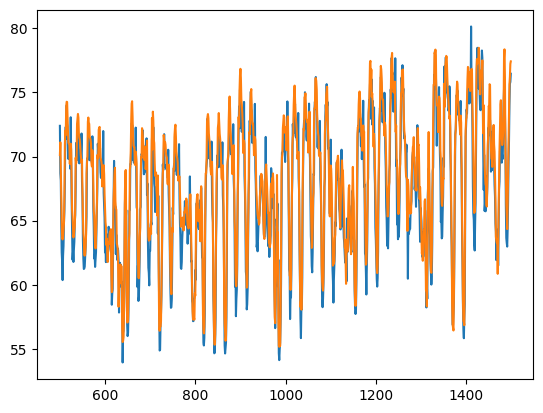

In [114]:
plot_predictions1(model5, X_test, y_test)